# Simple Iceberg Drift Model

An implementation of the model described in Turnball (2015).

### Equation of Motion

\begin{align}
M \frac{d \vec{V}}{dt} = \vec{F_a} + \vec{F_w} + \vec{F_c} + \vec{F_{wp}}
\end{align}

#### Air drag

\begin{align}
\vec{F_a} = (0.5 \rho_a C_a A_s + \rho_a C_{da} A_t ) \left| \vec{V_w} - \vec{V} \right| (\vec{V_w} - \vec{V})
\end{align}

#### Water drag

\begin{align}
\vec{F_w} = 
\end{align}

#### Coriolis

\begin{align}
\vec{F_c} &= 2 M \Omega \sin\phi \vec{k} \times \vec{V} \\
\end{align}

That is,

\begin{align}
\vec{F_c} / M &= (+f v, -fu, 0)
\end{align}

where $ f = 2\Omega \sin\phi $ is the Coriolis parameter.

#### Water pressure gradient

\begin{align}
\vec{F_{wp}} = 
\end{align}

### Iceberg shapes

The shape
* Tabular
* Non-Tabular
* Domed
* Pinnacle
* Wedge
* Drydock
* Blocky

is used to modify the parametrization for the external forces.

In [31]:
M_tons = 4.1e5 # metric tons
M = M_tons * 1000

### Applied forces

In [54]:
def Fc(vx, vy):
    """
    Calculate the Coriolis force
    """
    Ω = 7.2921e-5 # rotation rate of earth in rad/s
    ϕ = np.deg2rad(50) # start with a nominal value of 50 degrees N
    
    f = 2*Ω*np.sin(ϕ) # calculate the Coriolis parameter
    
    Fc_x = + f * vy * M
    Fc_y = - f * vx * M
    
    return Fc_x, Fc_y

In [55]:
def Fa(vx, vy):
    """
    Calculate the air drag
    """
    vwind_x = 12.0 # nominal value
    vwind_y = 0
    
    ρa = 1.225 # kg/m^3
    Ca = 0.1
    As = 72 * 22 # (maximum width (m) * sail height (m))
    Fa_x = -(0.5 * ρa * Ca * As) * abs(vwind_x - vx) * (vwind_x - vx)
    Fa_y = -(0.5 * ρa * Ca * As) * abs(vwind_y - vy) * (vwind_y - vy)
    
    return Fa_x, Fa_y

In [56]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

### Numerical scheme

In [50]:
## def solve():
    tmax = 36*60*60 # 36 hours
    dt = 1 # s

    # total number of timesteps
    N = round(tmax/dt)

    # allocate memory for arrays
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    ax = np.zeros(N)
    ay = np.zeros(N)
    t = np.zeros(N)

    # initial values
    x[0] = 0
    y[0] = 0
    vx[0] = 0
    vy[0] = 0
    ax[0] = 0
    ay[0] = 0
    t[0] = 0

    # integrate numerically
    for i in range(N-1):
        vx[i+1] = vx[i] + dt*ax[i]
        vy[i+1] = vy[i] + dt*ay[i]
    

        x[i+1] = x[i] + dt*vx[i+1]
        y[i+1] = y[i] + dt*vy[i+1]
  
        Fa_x, Fa_y = Fa(vx[i], vy[i])
        Fc_x, Fc_y = Fc(vx[i], vy[i])
        
        ax[i+1] = (Fa_x + Fc_x) / M
        ay[i+1] = (Fa_y + Fc_y) / M
        
        t[i+1] = t[i] + dt
        
        #print("{:8.1f} {:12.1f} {:12.1f} {:12.1f}".format(t[i+1], x[i+1], vx[i+1], ax[i+1]))
    
    return x, y, t

IndentationError: unexpected indent (<ipython-input-50-b2cf2f5bd584>, line 2)

#### Plotting routine

In [51]:
def plot(x, y):
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.plot(x, y)

#### Driver

In [52]:
x, y, t = solve()

<IPython.core.display.Javascript object>


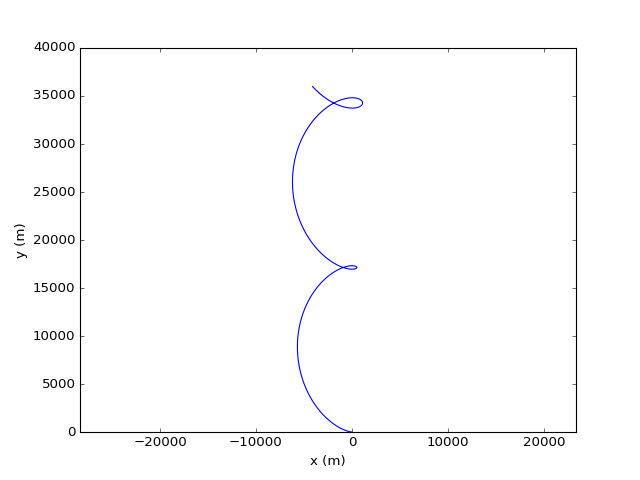

(-7000.0, 2000.0, 0.0, 40000.0)

In [53]:
fig, axes = plt.subplots()

plot(x,y)
plt.axis('equal')